In [239]:
import numpy as np
from sympy import diff, symbols
from scipy.optimize import approx_fprime
from scipy.optimize import minimize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

# Задание 1

#### Посчитать частные производные функции $f(x,y)=2x^2y^3 + \frac{1}{x} + y^2x + 7$ и градиент в точке (1, 2)



$f'_x= 4xy^3 - \frac{1}{x^2} + y^2 $

$f'_y= 6x^2y^2 + 2xy$

$f'_x(1, 2)= 32 - 1 + 4 = 35$

$f'_y(1, 2)= 24 + 4 = 28$

$grad_f(1, 2) = (35, 28)$

In [240]:
# scipy
def f(x):
    return 2 * x[0]**2 * x[1]**3 + 1/x[0] + x[1]**2 * x[0] + 7

eps = np.sqrt(np.finfo(float).eps)
grad = approx_fprime([1, 2], f, [eps, eps])

print(f'градиент функции в точке (1, 2) равен  {grad}')

градиент функции в точке (1, 2) равен  [35.00000024 28.00000024]


In [241]:
# sympy
x, y = symbols('x y')
f = 2 * x**2 * y**3 + 1/x + y**2 * x + 7

partialderiv_x = diff(f, x).evalf(subs={x:1, y:2})
partialderiv_y = diff(f, y).evalf(subs={x:1, y:2})

print(f'градиент функции в точке (1, 2) равен ({partialderiv_x}, {partialderiv_y})')

градиент функции в точке (1, 2) равен (35.0000000000000, 28.0000000000000)


#### Посчитать частные производные функции $f(x,y) = x^2y - sin(xy) + cos(x^2) + 6y$



$f'_x= 2xy - ycos(xy) - 2xsin(x^2)$

$f'_y= x^2 - xcos(xy) + 6$


# Задание 2

In [242]:
def f(x):
    return (x[0]**2) + (x[1]**2) 

In [243]:
x = np.array([100, 200])
learning_rate = 0.1

values_array = x.reshape(1, 2)

In [244]:
for i in range(100):
    # Calculate gradient
    eps = np.sqrt(np.finfo(float).eps)
    grad = approx_fprime(x, f, [eps, eps])

    # Update x with gradient
    x = x - learning_rate * grad
    values_array = np.concatenate((values_array, x.reshape(1,2)), axis=0)

In [245]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [1.29197811e-08 3.32901401e-08]
Значение функции в минимуме:  1.2751541739575636e-15


Проверка с помощью встроенной функции numpy: 

In [246]:
last_5_values = values_array[-5:]
gradients = np.gradient(last_5_values)

print(gradients)

[array([[-9.94646566e-09, -1.98929300e-08],
       [-8.95181910e-09, -1.79036370e-08],
       [-7.16145528e-09, -1.43229096e-08],
       [-5.72916422e-09, -1.14583277e-08],
       [-5.09259042e-09, -1.01851802e-08]]), array([[4.97323219e-08, 4.97323219e-08],
       [3.97858575e-08, 3.97858575e-08],
       [3.18286860e-08, 3.18286860e-08],
       [2.54629488e-08, 2.54629488e-08],
       [2.03703591e-08, 2.03703591e-08]])]


### Визуализация

In [247]:
# Make x0 and x1 data
x0_data = np.linspace(start=-2, stop=2, num=200)
x1_data = np.linspace(start=-2, stop=2, num=200)
x0_data, x1_data = np.meshgrid(x0_data, x1_data)
values_array = np.clip(values_array, -2, 2)

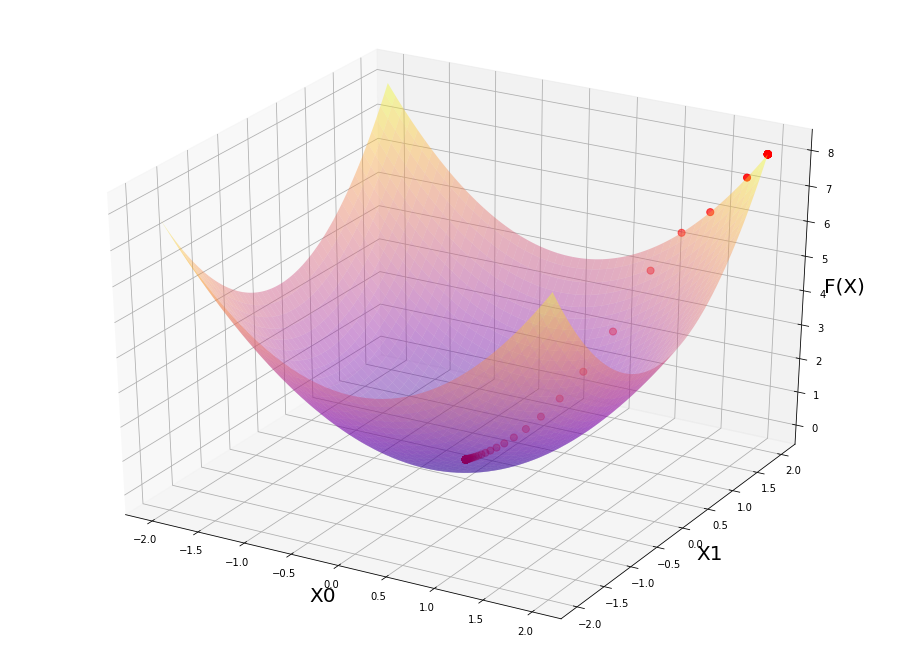

In [248]:
# Generating 3d plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X0', fontsize=20)
ax.set_ylabel('X1', fontsize=20)
ax.set_zlabel('F(X)', fontsize=20)

ax.plot_surface(x0_data, x1_data, f(np.array([x0_data, x1_data])), cmap=cm.plasma, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(np.array([values_array[:, 0], values_array[:, 1]])), s=50, color='red')

plt.show()

#### Минимизация с помощью optimize minimize

In [249]:
initial_x = np.array([100, 200])
res = minimize(f, initial_x, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 164


In [250]:
print(res.x)

[ 3.31391559e-09 -1.82888492e-09]
